In [1]:
import pandas as pd
import pytz, datetime
import pytz
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

from sklearn import metrics

In [2]:
gdas = pd.read_csv('teffDatav2MarAbr2021.csv',delimiter=r",+", skiprows=1, names=['id','date','teff', 'ts', 'ps'],lineterminator='\n')
gdas .drop(columns=['id'])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,date,teff,ts,ps
0,2021-03-23 00:00:00,260.122646,296.624823,1005.544648
1,2021-03-23 03:00:00,259.655996,294.739336,1008.125248
2,2021-03-23 06:00:00,259.500577,294.085997,1004.948688
3,2021-03-23 09:00:00,259.264327,293.775000,1004.542188
4,2021-03-23 12:00:00,259.120744,296.943493,1007.008148
...,...,...,...,...
116,2021-04-06 12:00:00,258.870137,296.919006,1004.547488
117,2021-04-06 15:00:00,259.184145,305.831841,1003.675788
118,2021-04-06 18:00:00,259.427542,297.165924,1001.119800
119,2021-04-06 21:00:00,259.486574,299.874079,999.895968


In [3]:
gdas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      121 non-null    int64  
 1   date    121 non-null    object 
 2   teff    121 non-null    float64
 3   ts      121 non-null    float64
 4   ps      121 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.9+ KB


In [4]:
gdas['date']=pd.to_datetime(gdas.date, format='%Y-%m-%d %H:%M:%S',utc=True)

gdas.set_index(['date'],drop=True, inplace=True)


In [5]:
path='datos2021/'
filenamePy=path+'flux.json'

In [6]:
py = pd.read_json (filenamePy, lines=True)
py['datetime']=pd.to_datetime(py.hora, unit='s',utc=True)
py.set_index(['datetime'],drop=True, inplace=True)
py= py.iloc[1:]

In [7]:
py.head()

,_id,eficiencia,coincidencia,conteo,canal_a,canal_b,hora
datetime,,,,,,,
2021-03-23 13:15:55.000000238+00:00,{'$oid': '6059ea0b7dd76969dd5499c5'},0.866667,0.108333,13,570,15,1.616505e+09
2021-03-23 13:17:55+00:00,{'$oid': '6059ea837dd76969dd5499d1'},1.000000,0.100000,12,577,13,1.616505e+09
2021-03-23 13:19:55+00:00,{'$oid': '6059eafb7dd76969dd5499d7'},0.666667,0.033333,4,524,5,1.616506e+09
2021-03-23 13:21:55.000000238+00:00,{'$oid': '6059eb737dd76969dd5499ef'},1.000000,0.191667,23,533,23,1.616506e+09
2021-03-23 13:23:55+00:00,{'$oid': '6059ebeb7dd76969dd5499f7'},1.000000,0.058333,7,506,12,1.616506e+09


In [8]:
py=py.resample('H').sum()
py['conteo']=py['conteo'].values/0.046
py['canal_a']=py['canal_a'].values/1.364
py['canal_b']=py['canal_b'].values/0.046
py['ratio']=py['canal_a'].values - py['conteo'].values
flagPy1=np.logical_and(py.index>"2021-03-18",py.index<"2021-04-07")
py=py[flagPy1]
sup=np.percentile(py['conteo'].values, 95)                
inf=np.percentile(py['conteo'].values, 6)  
flag=np.logical_and(py['conteo'].values<sup,py['conteo'].values>inf)
py=py[flag]

In [9]:
py.tail()

,eficiencia,coincidencia,conteo,canal_a,canal_b,hora,ratio
datetime,,,,,,,
2021-04-06 10:00:00+00:00,27.682615,3.408333,8891.304348,11307.917889,10152.173913,4.853115e+10,2416.613541
2021-04-06 11:00:00+00:00,28.232377,3.408333,8891.304348,11476.539589,9695.652174,4.853126e+10,2585.235242
2021-04-06 12:00:00+00:00,28.340945,3.441667,8978.260870,11186.950147,9739.130435,4.853136e+10,2208.689277
2021-04-06 13:00:00+00:00,28.224045,3.450000,9000.000000,11361.436950,9804.347826,4.853147e+10,2361.436950
2021-04-06 14:00:00+00:00,28.197451,3.375000,8804.347826,11285.190616,9739.130435,4.853158e+10,2480.842790


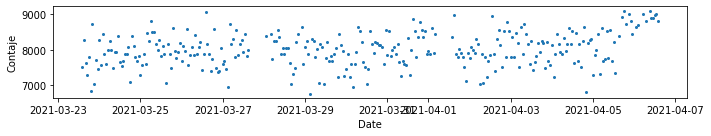

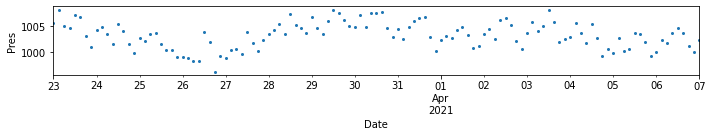

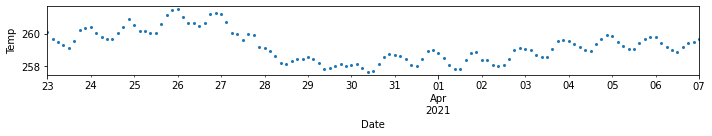

In [10]:
fig, axes = plt.subplots(1,1, figsize=(10,2), sharex=True)
py['conteo'].plot(subplots=True,marker='.', markersize=4, linestyle='None', ax=axes)
axes.set_ylabel('Contaje')
axes.set_xlabel('Date')
plt.tight_layout()
#plt.savefig('pngs/SerieCrudaContaje.png')

fig, axes = plt.subplots(1,1, figsize=(10,2), sharex=True)
gdas['ps'].plot(subplots=True,marker='.', markersize=4, linestyle='None', ax=axes)
axes.set_ylabel('Pres')
axes.set_xlabel('Date')
plt.tight_layout()

#plt.savefig('pngs/GDASTefSerieCrudaPress.png')
fig, axes = plt.subplots(1,1, figsize=(10,2), sharex=True)
gdas['teff'].plot(subplots=True,marker='.', markersize=4, linestyle='None', ax=axes)
axes.set_ylabel('Temp')
axes.set_xlabel('Date')
plt.tight_layout()
#plt.savefig('pngs/GDASTefSerieCrudaTemp.png')




In [11]:
#flagB=counts.eficiencia>=0.7
countsClean=py

In [12]:
combined = gdas.join(countsClean['conteo'], how='outer')
combined=combined.drop(combined.index[0])
#combined[18000:].head()

In [13]:
#remove data
#flag=np.logical_and(combined.index>="2021-3-24",combined.index<="2021-3-25 ")
flag=np.logical_and(combined.index>"2021-03-18",combined.index<"2021-04-08")

In [14]:
#normalize delta
Im=combined['conteo'].dropna().mean()
combined['dIoIm']=(combined['conteo'][flag]-Im)/(Im)*100
P0=combined['ps'][flag].dropna().mean()
combined['dP']=(combined['ps'][flag]-P0)
                

In [15]:
P0

1003.1735197148012

In [16]:
Tg=combined['teff'][flag].dropna().mean()
combined['dTg']=(combined['teff'][flag]-Tg)

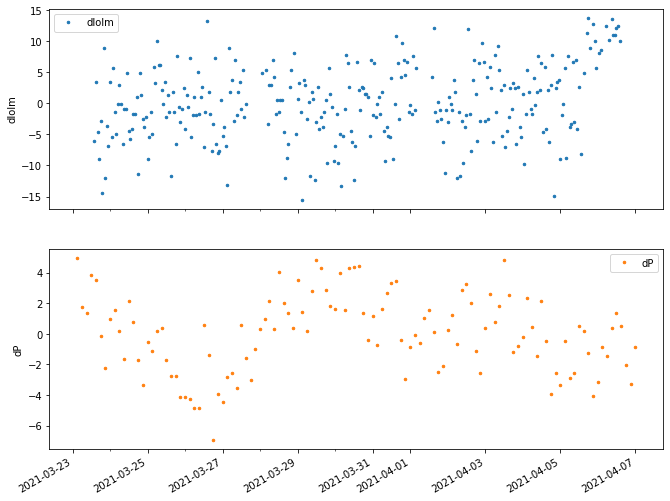

In [17]:
var = ['dIoIm', 'dP']

axes = combined[var][flag].plot(marker='.', markersize=5 , linestyle='None', figsize=(11, 9), subplots=True)
#axes = combined[var].plot(marker='.', alpha=1, linestyle='None', figsize=(11, 9), subplots=True)
for ax,v in zip(axes,var):
    ax.set_ylabel(v)
#plt.savefig('pngs/GDASTefSerieDeltaIComOutrliers.png')

In [18]:
combined=combined[flag]

In [19]:
#remove outliers
var='dIoIm'
distance = 1.5 * (np.percentile(combined[var][~np.isnan(combined[var])], 75) - np.percentile(combined[var][~np.isnan(combined[var])], 25))
fA=combined[var]< distance + np.percentile(combined[var][~np.isnan(combined[var])], 75)
fB=combined[var] > np.percentile(combined[var][~np.isnan(combined[var])], 25) - distance
fC=np.isnan(combined[var]) 
combinedNew=combined[np.logical_or(np.logical_and(fA,fB),fC)]


In [20]:
flagNa=~np.isnan(combinedNew['dIoIm'].values)

In [21]:
combinedNew = combinedNew.apply(
    pd.Series.interpolate, 
    args=('index',) 
)

In [22]:
combinedNew=combinedNew[flagNa]

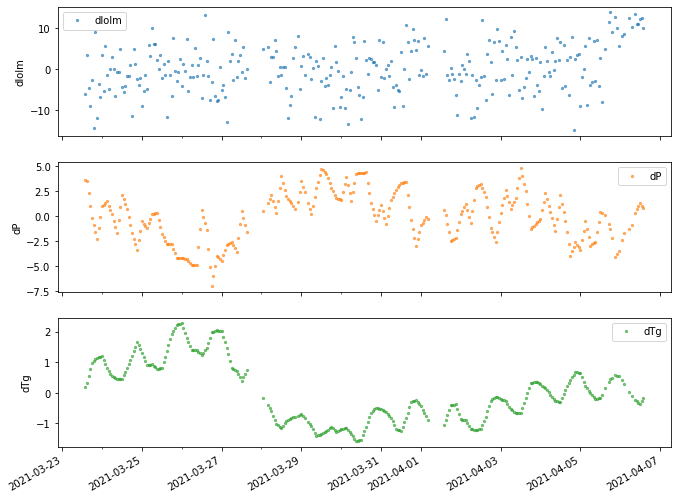

In [23]:
var = ['dIoIm', 'dP','dTg']
axes = combinedNew[var].plot(marker='.',markersize=4.5, linestyle='None', alpha=0.6, figsize=(11, 9), subplots=True)
#axes = combined[var].plot(marker='.', alpha=1, linestyle='None', figsize=(11, 9), subplots=True)
for ax,v in zip(axes,var):
    ax.set_ylabel(v)
#plt.savefig('pngs/GDASTefSeries.png')

In [24]:
combinedNewHour=combinedNew.resample('H').mean()

In [25]:
combinedNewHour['dIoIm']

2021-03-23 14:00:00+00:00    -6.012259
2021-03-23 15:00:00+00:00     3.495171
2021-03-23 16:00:00+00:00    -4.654055
2021-03-23 17:00:00+00:00    -9.000309
2021-03-23 18:00:00+00:00    -2.752569
                               ...    
2021-04-06 10:00:00+00:00    11.101116
2021-04-06 11:00:00+00:00    11.101116
2021-04-06 12:00:00+00:00    12.187679
2021-04-06 13:00:00+00:00    12.459320
2021-04-06 14:00:00+00:00    10.014552
Freq: H, Name: dIoIm, Length: 337, dtype: float64

In [26]:
combinedNewHour=combinedNewHour.dropna()

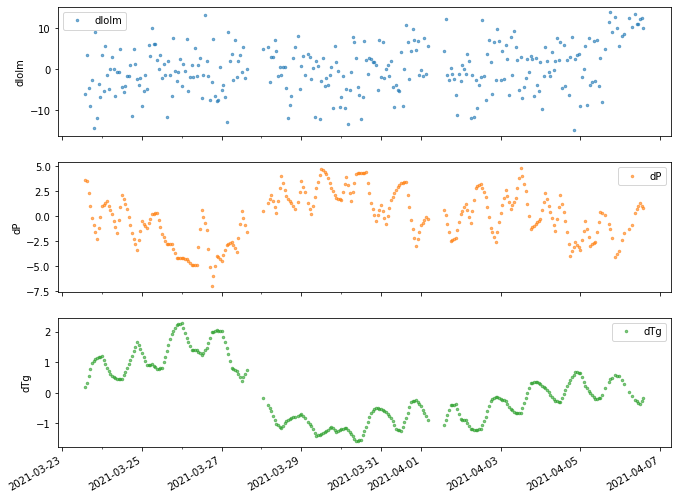

In [28]:
var = ['dIoIm', 'dP','dTg']
axes = combinedNewHour[var].plot(marker='.',markersize=5, linestyle='None', alpha=1.6, figsize=(11, 9), subplots=True)
#axes = combined[var].plot(marker='.', alpha=1, linestyle='None', figsize=(11, 9), subplots=True)
for ax,v in zip(axes,var):
    ax.set_ylabel(v)
#plt.savefig('pngs/GDASTefSeriesDeltaIDeltaPDeltaTgPorHOra.png')

In [29]:
lm = LinearRegression() 
X=combinedNewHour['dP'].values.reshape(-1,1)
Y=combinedNewHour['dIoIm']

In [30]:
lm.fit(X,Y)

LinearRegression()

In [31]:
print(lm.intercept_)
print(lm.coef_)

0.04827132639628081
[-0.1817299]


In [32]:
pred=lm.predict(X)
print(np.sum(np.square(np.square(pred - Y))))

987680.0026560482


In [33]:
print("R-squared value of this fit:",round(metrics.r2_score(Y,pred),3))

R-squared value of this fit: 0.006


In [34]:
combinedNewHour['dP'].corr(combinedNewHour['dIoIm'])

-0.07495863786634797

In [35]:
combinedNew['dP'].corr(combinedNew['dIoIm'])

-0.07495863786634797

/home/lmenode1/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='dIoIm'>

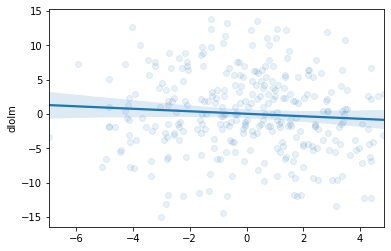

In [38]:
sns.regplot(combinedNewHour['dP'].values.reshape(-1,1),combinedNewHour['dIoIm'],scatter_kws={'alpha':0.1})
#plt.savefig('pngs/GDASTefscatterdPvsDIoIm.png')

In [39]:
lm.coef_

array([-0.1817299])

In [40]:
#combinedNewHour['dIoImPC']=combinedNewHour['dIoIm']-pred
combinedNewHour['dIoImPC']=combinedNewHour['dIoIm']-lm.coef_*combinedNewHour['dP']

/home/lmenode1/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='dIoImPC'>

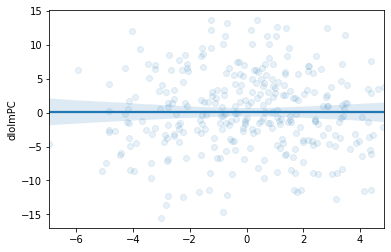

In [42]:
sns.regplot(combinedNewHour['dP'].values.reshape(-1,1),combinedNewHour['dIoImPC'],scatter_kws={'alpha':0.1})
#plt.savefig('pngs/GDASTefscatterdPvsDIoImPC.png')

In [43]:
combinedNewHour['dP'].corr(combinedNewHour['dIoImPC'])

-6.478044645706591e-17

0.0544386338753854
[-0.36831215]
1046587.4622809642
[-0.36831215]


/home/lmenode1/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/lmenode1/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='dIoImPTC'>

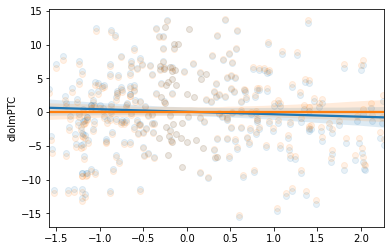

In [46]:
lmT = LinearRegression() 
XT=combinedNewHour['dTg'].values.reshape(-1,1)
YT=combinedNewHour['dIoImPC']
lmT.fit(XT,YT)
print(lmT.intercept_)
print(lmT.coef_)
predT=lmT.predict(X)
print(np.sum(np.square(np.square(predT - YT))))
print(lmT.coef_)
#combinedNewHour['dIoImPC']=combinedNewHour['dIoIm']-pred
combinedNewHour['dIoImPTC']=combinedNewHour['dIoImPC']-lmT.coef_*combinedNewHour['dTg']
sns.regplot(combinedNewHour['dTg'].values.reshape(-1,1),combinedNewHour['dIoImPC'],scatter_kws={'alpha':0.1})
#plt.savefig('pngs/GDASTefscatterdTgvsDIoImPC.png')

sns.regplot(combinedNewHour['dTg'].values.reshape(-1,1),combinedNewHour['dIoImPTC'],scatter_kws={'alpha':0.1})
#plt.savefig('pngs/GDASTefscatterdTgvsDIoImPC.png')


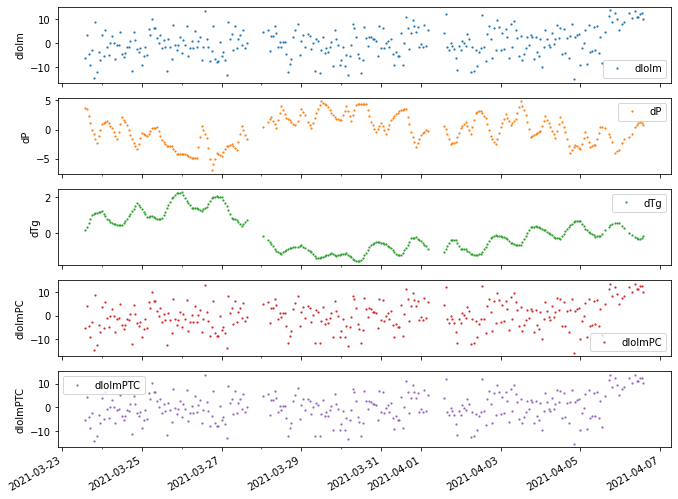

In [48]:
var = ['dIoIm', 'dP','dTg','dIoImPC','dIoImPTC']
axes = combinedNewHour[var].plot(marker='.',markersize=2.5, linestyle='None', alpha=0.9, figsize=(11, 9), subplots=True)
#axes = combined[var].plot(marker='.', alpha=1, linestyle='None', figsize=(11, 9), subplots=True)
for ax,v in zip(axes,var):
    ax.set_ylabel(v)
#plt.savefig('pngs/GDASTefSeriesDIoImvsdPvsDIoImPTC.png') 

In [49]:
combinedNewHour.head()

,id,teff,ts,ps,conteo,dIoIm,dP,dTg,dIoImPC,dIoImPTC
2021-03-23 14:00:00+00:00,4.666667,259.414943,303.744243,1006.811348,7521.739130,-6.012259,3.637828,0.184327,-5.351157,-5.283267
2021-03-23 15:00:00+00:00,5.000000,259.562042,307.144617,1006.712948,8282.608696,3.495171,3.539428,0.331426,4.138391,4.260459
2021-03-23 16:00:00+00:00,5.333333,259.781640,306.937276,1005.486781,7630.434783,-4.654055,2.313261,0.551024,-4.233666,-4.030717
2021-03-23 17:00:00+00:00,5.666667,260.001239,306.729934,1004.260614,7282.608696,-9.000309,1.087095,0.770623,-8.802751,-8.518921
2021-03-23 18:00:00+00:00,6.000000,260.220837,306.522593,1003.034448,7782.608696,-2.752569,-0.139072,0.990221,-2.777842,-2.413132


In [50]:
combinedNewHour.tail()

,id,teff,ts,ps,conteo,dIoIm,dP,dTg,dIoImPC,dIoImPTC
2021-04-06 10:00:00+00:00,115.333333,258.953906,294.380848,1003.887128,8891.304348,11.101116,0.713608,-0.276710,11.230800,11.128884
2021-04-06 11:00:00+00:00,115.666667,258.912021,295.649927,1004.217308,8891.304348,11.101116,1.043788,-0.318595,11.290803,11.173461
2021-04-06 12:00:00+00:00,116.000000,258.870137,296.919006,1004.547488,8978.260870,12.187679,1.373968,-0.360480,12.437370,12.304601
2021-04-06 13:00:00+00:00,116.333333,258.974806,299.889951,1004.256921,9000.000000,12.459320,1.083402,-0.255810,12.656206,12.561989
2021-04-06 14:00:00+00:00,116.666667,259.079476,302.860896,1003.966355,8804.347826,10.014552,0.792835,-0.151141,10.158634,10.102967


In [55]:
combinedNewHour['Year'] =combinedNewHour.index.year
combinedNewHour['Month'] = combinedNewHour.index.month
combinedNewHour['day'] = combinedNewHour.index.day
combinedNewHour['hour'] = combinedNewHour.index.hour
combinedNewHour['hour3'] = combinedNewHour.index.hour-3


Text(0, 0.5, 'dIoImPTC')

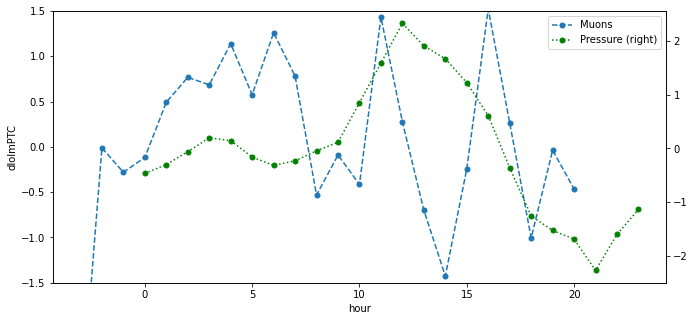

In [56]:
#fig, ax = plt.subplots(figsize=(15,7))
#combinedNew.groupby(['hour']).mean()['count'].plot(ax=ax,marker='.',markersize=5, linestyle='none',legend=True,label='Muons',alpha=1, figsize=(11, 5),ax=ax)
ax = plt.gca()
combinedNewHour.groupby(['hour3']).mean()['dIoImPTC'].plot(marker='.',markersize=10,ylim=(-1.5,1.5), linestyle='dashed',legend=True,label='Muons',alpha=1, figsize=(11, 5),ax=ax)
ax_secondary =combinedNewHour.groupby(['hour']).mean()['dP'].plot(ax=ax,marker='.',markersize=10, label='Pressure', linestyle='dotted',
    legend=True, secondary_y=True, color='g')
ax.set_ylabel('dIoImPTC')
#plt.savefig('GDASTefDayHourdIoImTPChourlyPres.png')